# Este código nos permitirá realizar análisis de sentimiento sobre una base de datos de tweets recogidos en la localidad de Murcia España
https://www.pybonacci.org/2015/11/24/como-hacer-analisis-de-sentimiento-en-espanol-2/

In [91]:
import pandas as pd
pd.set_option('max_colwidth',1000)

Cargamos la base de datos de TASS, con tweets catálogados que nos permitirá hacer el entrenamiento de algoritmos de machine learning, estos tienen una polaridad asignada para cada tweet.

In [92]:
general_tweets_corpus_train = pd.read_csv('general-tweets-train-tagged.csv', encoding='utf-8')
social_tweets_corpus_train = pd.read_csv('socialtv-tweets-train-tagged.csv', encoding='utf-8')
stompol_tweets_train_tagged = pd.read_csv('stompol-tweets-train-tagged.csv', encoding='utf-8')
#tweet_testeo = pd.read_csv('tweet_test.csv', encoding='utf-8')

In [93]:
general_tweets_corpus_train.head()

,content,polarity,agreement
0,"Salgo de #VeoTV , que día más largoooooo...",NONE,AGREEMENT
1,@PauladeLasHeras No te libraras de ayudar me/nos. Besos y gracias,NEU,DISAGREEMENT
2,@marodriguezb Gracias MAR,P,AGREEMENT
3,"Off pensando en el regalito Sinde, la que se va de la SGAE cuando se van sus corruptos. Intento no sacar conclusiones (lo intento)",N+,AGREEMENT
4,Conozco a alguien q es adicto al drama! Ja ja ja te suena d algo!,P+,AGREEMENT


In [94]:
social_tweets_corpus_train.head()

,content,polarity,agreement
0,Los que esta noche van a la redonda a celebrar la victoria del Real Madrid les espero para cuando suba el @realmurciacfsad a primera.,P,
1,Diooooos que careron de gareth madreeeeee ahí están los jugadores importantes decidiendo partidos vamos coñoooooooo jajaja hala madrid,P,
2,Ganó el mejor. @realmadrid #CopaRelRey #FinalCopaRelRey,P,
3,@realmadrid Felicidades!!! ? Gracias por alegrarme la tarde!!! ??? *Aplausos* #Feliz,P,
4,@titelas Mañana Bale en naranja,NEU,


In [95]:
stompol_tweets_train_tagged.head()

,content,polarity,agreement
0,Diga cuanto nos van a costar las autovías de sus amiguetes ¿4500 millones o más ? @EsperanzAguirre @PPopular,N,
1,@lhermoso_ @sanchezcastejon #DobleMoral Castilla antes que Aragón...,N,
2,@PSOE @sanchezcastejon Me hace mucha gracia que esa afirmación la haga el PSOE,N,
3,Para que todo el mundo lo tengo claro .... @CsAlzira_ https://t.co/kcDxbhu3Ha,NEU,
4,@Albert_Rivera y @CiudadanosCs saben q este país es progresista pero q se arruga y vota centro. Discurso moderado y electoralista.,N,


Concatenamos los Tweets cargados anteriormente en un solo Corpus

In [96]:
tweets_corpus = pd.concat([
        general_tweets_corpus_train,
        social_tweets_corpus_train,
        stompol_tweets_train_tagged,
        #tweet_testeo,
    ])
tweets_corpus.sample(5)

,content,polarity,agreement
3003,Revisión de misiones. #Morenés.Pero no especifica nada.,NONE,AGREEMENT
7051,Buenos dias. Lagarde (FMI) avisa de que Grecia puede quebrar y salir del euro...la amenaza ya se conoce pero la receta para evitarlo?,N+,AGREEMENT
6004,DEP Paco Valladares! En mi corazón por tanto y tanto que nos ha ¨entretenido¨ por tanto y tanto que nos ha dejado....,P,AGREEMENT
1039,Buscan a una niña de 13 años desaparecida en Pola de Lena (Asturias) - http://t.co/OMbySqPb,N,AGREEMENT
4831,Con el club de fans en Torrevieja http://t.co/aU8lcsaT,P,AGREEMENT


Filtramos tweets en desacuerdo y sin polaridad y removemos los tweets que son solo hipervinculos

In [97]:
tweets_corpus = tweets_corpus.query('agreement != "DISAGREEMENT" and polarity != "NONE"')
tweets_corpus = tweets_corpus[-tweets_corpus.content.str.contains('^http.*$')]

In [98]:
tweets_corpus.size  #tamaño vector entrenamiento

22650

In [99]:
tweets_corpus.sample(10)

,content,polarity,agreement
1583,Buenos días. Espero que esta noche merezca la pena.,P,AGREEMENT
5615,"Entre 25.000 y 35.000 personas se han manifestado hoy en Madrid convocados por los sindicatos, según cálculos policiales.",NEU,AGREEMENT
228,Otro enchufado más antes de que se vaya ZP http://t.co/Jb983lka,N,AGREEMENT
2086,Como s genera nuestro déficit:15.000 millones las com autónomas.5000 mill seg social.3000 mill Estado.1500 mill ayuntam http://t.co/wIw3IXeC,N+,AGREEMENT
5139,"Desglose #déficit 5'8: Estado 4%, SSocial equilibrio, CC.AA 1'5%, corp locales 0'3%. Previsión gobierno #CMin",N,AGREEMENT
4344,Jejeje esto que es?... No entiendo mucho pero os mando abrazos. RT @LasPrimasDSanz: @AlejandroSanz @AlejandroSanz 31 Days #without nif,NEU,AGREEMENT
5899,Qué poco dura el buen rollo humano hasta en la casa de los que ganan. Basta una mirada a Génova... o a Moncloa,N,AGREEMENT
4175,Sigue la polémica sobre el escenario de la final de Copa ¿Debería celebrarse en el Bernabéu?,N,AGREEMENT
812,"Aún asi, con messi y cristiano hubiera estao mas guapo",P,
3781,Querida @NoemiGaleraN en este momento me alegro tanto de no ser jurado en @A3NumeroUno ! Cada vez sale uno mejor !!,P+,AGREEMENT


Seguiremos con el proceso de Tokenizar y stemming

Primero descargaremos las stopwords

In [100]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jromanf/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Luego cargaremos las stopwords en español

In [101]:
from nltk.corpus import stopwords
spanish_stopwords = stopwords.words('spanish')

In [102]:
from string import punctuation
non_words = list(punctuation)
#we add spanish punctuation
non_words.extend(['¿', '¡'])
non_words.extend(map(str,range(10)))

Creamos a continuación las funciones para token y stemm

In [103]:
#Funcion token, stem
from sklearn.feature_extraction.text import CountVectorizer       
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize


stemmer = SnowballStemmer('spanish')
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    # remove non letters
    text = ''.join([c for c in text if c not in non_words])
    # tokenize
    tokens =  word_tokenize(text)

    # stem
    try:
        stems = stem_tokens(tokens, stemmer)
    except Exception as e:
        print(e)
        print(text)
        stems = ['']
    return stems


Vamos a evaluar el modelo con los tweets que tienen una polaridad diferente a la neutral

In [104]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

tweets_corpus = tweets_corpus[tweets_corpus.polarity != 'NEU']

tweets_corpus['polarity_bin'] = 0
tweets_corpus.polarity_bin[tweets_corpus.polarity.isin(['P', 'P+'])] = 1
tweets_corpus.polarity_bin.value_counts(normalize=True)

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


1    0.548709
0    0.451291
Name: polarity_bin, dtype: float64

In [105]:
tweets_corpus.sample(10)

,content,polarity,agreement,polarity_bin
716,"A las primeras 500 solicitudes recibidas se les enviara una especie de ""entrada"" para acceder al ""evento"".#merendolatuitera",P+,AGREEMENT,1
509,Me quedo con el carreron de Bale ... casi se queda sin campo. Carvajal partidazo . #HalaMadrid,P,,1
6585,"Empezamos enseguida!!! Si quiere información con criterio, @TelediarioInter 20:30 es su telediario.",P,AGREEMENT,1
1456,Madrid campeón de copa del rey ! Por encima del barca jaja hala Madrid !,P,,1
1815,Amaiur se garantiza protagonismo en el #Congreso hasta el verano http://t.co/7Ib68EDP,P+,AGREEMENT,1
2979,Este disco jura. ;) RT @Guspireta_a: @AlejandroSanz este disco promete???,P,AGREEMENT,1
1034,"UPN reivindica el orgullo de ser españoles, sin complejos. Me ha sonado a Aznar",P+,AGREEMENT,1
1449,Ahora lo que tiene que hacer ramos es no tirar la copa jajaja jajaj CAMPEONES! !!!!!,N,,0
1698,"Bdia. Hoy estrena Mario picazo en TVE. Climas extremos. La vida casi imposible http://t.co/qAydVJGWSuerte, amigo!!",P+,AGREEMENT,1
45,Ramos que no coja la copa que la jode,N,,0


In [106]:
#SVM
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

#Creamos un Pipeline con los parámetros mejores
pipeline = Pipeline([
    ('vect', CountVectorizer(
            analyzer = 'word',
            tokenizer = tokenize,
            lowercase = True,
            stop_words = spanish_stopwords,
            min_df = 50,
            max_df = 1.9,
            ngram_range=(1, 1),
            max_features=1000
            )),
    ('cls', LinearSVC(C=.2, loss='squared_hinge',max_iter=1000,multi_class='ovr',
             random_state=None,
             penalty='l2',
             tol=0.0001
             )),
])

In [107]:
#ajustamos el modelo at corpus de TASS
pipeline.fit(tweets_corpus.content, tweets_corpus.polarity_bin)

/opt/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'estab', 'estais', 'estam', 'estan', 'estand', 'estaran', 'estaras', 'esteis', 'estem', 'esten', 'estes', 'estuv', 'fuer', 'fues', 'fuim', 'fuist', 'hab', 'habr', 'habran', 'habras', 'hast', 'hem', 'hub', 'mas', 'mia', 'mias', 'mio', 'mios', 'much', 'nad', 'nosotr', 'nuestr', 'par', 'per', 'poc', 'porqu', 'qui', 'seais', 'seam', 'sent', 'ser', 'seran', 'seras', 'si', 'sient', 'sint', 'sobr', 'som', 'suy', 'tambien', 'tant', 'ten', 'tendr', 'tendran', 'tendras', 'teng', 'tien', 'tod', 'tuv', 'tuy', 'vosotr', 'vuestr'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.9,
                                 max_features=1000, min_df=50,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no'...
                                             'o', 'este', 'sí', 'porque', ...],
                                 strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function tokenize at 0x7f8a6e2f1a60>,
                  

A continuación cargamos los textos para el análisis de sentimiento, en este caso un conjunto de tweets y los
organizamos en el formato requerido

In [108]:
#Cargar textos para el analisis vector Test desde MongoDB
from pymongo import MongoClient

# Create a client instance of MongoClient
client= MongoClient('mongodb://localhost:27017/')
db= client.cultura
collection  = db.prueba1
# Convertir a Panda
import pandas as pd

tweets_test = pd.DataFrame(list(collection.find()))
tweets_test_kNN = tweets_test
#Eliminar valores nan de la columna tweet
tweets_test['tweet'] = tweets_test['tweet'].fillna(' ')

In [109]:
#Metemos los datos al modelo, a diferenia del anterior hubo que agreagar al final astype str
tweets_test['polarity'] = pipeline.predict(tweets_test.tweet.astype(str))

In [110]:
tweets_test.head()

,_id,lat,lon,timestamp,tweet,user,polarity
0,5d1b8c3a5923dbcca28bd256,37.9774,-1.063,Tue Apr 15 02:23:01 +0000 2014,Ahora mismo si tuviese una pistola me pegaba un tiro sin pensarlo.,@AlexLuna_72,0
1,5d1b8c3a5923dbcca28bd257,,,Tue Apr 15 02:23:22 +0000 2014,Hola. Visto 05:36. Ms que Visto 05:38. Ignorado 05:41. No le importas 5:58.,@Gissell_Tytta,1
2,5d1b8c3a5923dbcca28bd258,37.9798,-1.06197,Tue Apr 15 02:23:32 +0000 2014,Buenas noches a todos... Fav ;) juju,@69Rikifriki,1
3,5d1b8c3a5923dbcca28bd259,,,Tue Apr 15 02:24:44 +0000 2014,JAJAJA,@Gissell_Tytta,1
4,5d1b8c3a5923dbcca28bd25a,38.0688,-1.19224,Tue Apr 15 02:25:22 +0000 2014,Salimos para a corua :),@AndreaGalian,1


In [111]:
#Cantidad de positivos y negativos SVM
EstimadosSVM = tweets_test_kNN.polarity.value_counts(normalize=True)
EstimadosSVM

1    0.7654
0    0.2346
Name: polarity, dtype: float64

Text(0.5, 1.0, 'SVM Polaridad de Tweets')

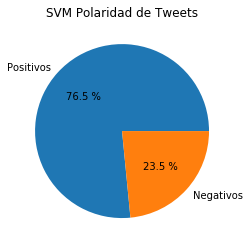

In [112]:
#Realizaremos gráfico de tortas SVM
import matplotlib.pyplot as plt
import numpy as np


plt.ion()  # Ponemos el modo interactivo
pol = [EstimadosSVM.get_values()[0]*100,EstimadosSVM.get_values()[1]*100] # Definimos un vector con el % de visitas del top ten de países
#pol = np.append(pol, 100. - np.sum(pol)) # Introducimos un último elemento que recoge el % de visitas de otros países fuera del top ten
percepcion = [u'Positivos', u'Negativos']  # Etiquetas para los quesitos
explode = [0.2, 0]  # Esto nos ayudará a destacar algunos quesitos
plt.pie(pol, labels = percepcion, autopct="%0.1f %%")  # Dibuja un gráfico de quesitos
plt.title(u'SVM Polaridad de Tweets')

In [113]:
#### Análisis de datos con kNN #####
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier

vectorizer = TfidfVectorizer(stop_words=spanish_stopwords)
X = vectorizer.fit_transform(tweets_corpus.content)
y_train=tweets_corpus['polarity_bin']
# Clustering the document with KNN classifier
modelknn = KNeighborsClassifier(n_neighbors=10)
modelknn.fit(X,y_train)


#Cargar textos para el analisis vector Test

tweets_test_kNN['tweet'] = tweets_test_kNN['tweet'].fillna(' ')

Test = vectorizer.transform(tweets_test_kNN.tweet.astype(str))
predicted_labels_knn = modelknn.predict(Test)

tweets_test_kNN['polarity'] = predicted_labels_knn

In [114]:
#Almacenar datos de resultados en una colección de Mongo llamada "sentimientos"
#collection2=db.sentimientos
#collection2.insert_many(tweets_test.to_dict('records'))

In [115]:
tweets_test_kNN.head(10)

,_id,lat,lon,timestamp,tweet,user,polarity
0,5d1b8c3a5923dbcca28bd256,37.9774,-1.063,Tue Apr 15 02:23:01 +0000 2014,Ahora mismo si tuviese una pistola me pegaba un tiro sin pensarlo.,@AlexLuna_72,0
1,5d1b8c3a5923dbcca28bd257,,,Tue Apr 15 02:23:22 +0000 2014,Hola. Visto 05:36. Ms que Visto 05:38. Ignorado 05:41. No le importas 5:58.,@Gissell_Tytta,0
2,5d1b8c3a5923dbcca28bd258,37.9798,-1.06197,Tue Apr 15 02:23:32 +0000 2014,Buenas noches a todos... Fav ;) juju,@69Rikifriki,1
3,5d1b8c3a5923dbcca28bd259,,,Tue Apr 15 02:24:44 +0000 2014,JAJAJA,@Gissell_Tytta,0
4,5d1b8c3a5923dbcca28bd25a,38.0688,-1.19224,Tue Apr 15 02:25:22 +0000 2014,Salimos para a corua :),@AndreaGalian,1
5,5d1b8c3a5923dbcca28bd25b,37.974,-1.0683,Tue Apr 15 02:25:36 +0000 2014,No va desencaminado!! #MundialBrasil2014 http://t.co/yhDfeN3Z6k,@Fran_pardotomas,0
6,5d1b8c3a5923dbcca28bd25c,,,Tue Apr 15 02:25:50 +0000 2014,@Maikykrmusic Te quiero mucho mucho mi vida &lt;3,@Gissell_Tytta,1
7,5d1b8c3a5923dbcca28bd25d,,,Tue Apr 15 02:26:07 +0000 2014,Oh maana tengo Edu.Fisica,@daniel_sotoo,1
8,5d1b8c3a5923dbcca28bd25e,37.9798,-1.06197,Tue Apr 15 02:26:28 +0000 2014,"@AlexLuna_72 calla, alexis primo dejate las tonterias que todo pasa y vienen cosas mejores Buenas noches manico",@69Rikifriki,1
9,5d1b8c3a5923dbcca28bd25f,,,Tue Apr 15 02:28:41 +0000 2014,@dayi_9926 fback cute acc,@whomaktub,1


In [116]:
#Cantidad de positivos y negativos SVM
EstimadosKNN = tweets_test_kNN.polarity.value_counts(normalize=True)
EstimadosKNN

1    0.6936
0    0.3064
Name: polarity, dtype: float64

Text(0.5, 1.0, 'kNN Polaridad de Tweets')

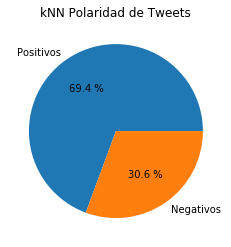

In [117]:
#Realizaremos gráfico de tortas kNN
import matplotlib.pyplot as plt
import numpy as np


plt.ion()  # Ponemos el modo interactivo
pol = [EstimadosKNN.get_values()[0]*100,EstimadosKNN.get_values()[1]*100] # Definimos un vector con el % de visitas del top ten de países
#pol = np.append(pol, 100. - np.sum(pol)) # Introducimos un último elemento que recoge el % de visitas de otros países fuera del top ten
percepcion = [u'Positivos', u'Negativos']  # Etiquetas para los quesitos
explode = [0.2, 0]  # Esto nos ayudará a destacar algunos quesitos
plt.pie(pol, labels = percepcion, autopct="%0.1f %%")  # Dibuja un gráfico de quesitos
plt.title(u'kNN Polaridad de Tweets')

In [118]:
#Crear archivos de excel con los resultados de sentimientos
tweets_test.to_excel(r'sentimientosSVM_tweets.xlsx')
tweets_test_kNN.to_excel(r'sentimientosKNN_tweets.xlsx')

In [119]:
# Almacenar en dos bases de datos en MongoDB una para SVM y otra para kNN
#Almacenar datos en una colección de Mongo
collist = db.list_collection_names()

## ALMACENAR RESULTADOS SVM ###
if "sentimientosSVM" in collist:
 db.sentimientosSVM.drop()   
 db.sentimientosSVM.insert_many(tweets_test.to_dict('records'))
else:
    db["sentimientosSVM"]
    db.sentimientosSVM.insert_many(tweets_test.to_dict('records'))

In [120]:
## ALMACENAR RESULTADOS SVM ###
if "sentimientosKNN" in collist:
 db.sentimientosKNN.drop()   
 db.sentimientosKNN.insert_many(tweets_test_kNN.to_dict('records'))
else:
    db["sentimientosKNN"]
    db.sentimientosKNN.insert_many(tweets_test_kNN.to_dict('records'))